In [1]:
# EDA pamages 
import pandas as pd

#hide earrings 
import warnings
warnings.filterwarnings('ignore')

from textblob import TextBlob

from pandas.io.json import json_normalize

from collections import Counter 

# Data Viz pakages
import matplotlib.pyplot as plt
import seaborn as sns

#pip install wordcloud
from wordcloud import WordCloud

In [2]:
#load data
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\covid19_tweets.csv")

In [3]:
#here i am droping all null values for forever 
df.dropna(inplace=True)

In [4]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179101,New Jersey Herald,"Newton, NJ","The New Jersey Herald, a daily newspaper in Ne...",2010-01-07 18:19:37,6274,162,38,False,2020-08-29 19:44:27,Wallkill school nurse adds COVID-19 monitoring...,"['nurses', 'COVID19', 'coronavirus', 'schools']",SocialNewsDesk,False
179102,Pris,T.O.,"A/V/L Techie, camera op. but twitter has becom...",2008-12-31 16:16:12,251,160,627,False,2020-08-29 19:44:23,"we have reached 25mil cases of #covid19, world...",['covid19'],Twitter Web App,False
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False


# Lower casing

In [5]:
# the whole dataset is converted into lowercase()
df=df.apply(lambda x: x.astype(str).str.lower()) 

In [6]:
''' here i am importing the cleaning package and the package
    library is intended to solve the problems of
    1)Cleaning unstructured text data.
    2)Reducing noise in text.
    3)Avoid repetition of the same code for pre-processing.'''
import neattext as nfx

# 1)Removing punctuations like (. , !) 2) Removing URLs 3) Removing Stop words

In [7]:
'''here i define function with two variables to get difference of previous and new columns
afterwards i cleaned all unwantEd thkings fROM data such as below '''
def get_clean_data_column (new_column_name , column_name ):
    df[new_column_name] = df[column_name].apply(nfx.remove_emojis)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_numbers)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_punctuations)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_special_characters)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_multiple_spaces)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_stopwords)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_urls)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_visacard_addr)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_terms_in_bracket)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_street_address)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_puncts)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_postoffice_box)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_phone_numbers)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_html_tags)
    df[new_column_name] = df[new_column_name].apply(nfx.remove_currency_symbols)
    return df[new_column_name]

In [8]:
'''here i made a dictionary in which i gave the names of new and previous columns '''
dict_names ={'cleaning_text':'text'}
#this the loop in dictionary 
for i ,j in dict_names.items():
    #here i m call my custom function to clean the dataset
    get_clean_data_column(i,j)

In [9]:
'''here i got my cleaned data after some instructions'''
df[['text','cleaning_text']].head()

,text,cleaning_text
2,@diane3443 @wdunlap @realdonaldtrump trump nev...,diane wdunlap realdonaldtrump trump claimed co...
3,@brookbanktv the one gift #covid19 has give me...,brookbanktv gift covid appreciation simple thi...
4,25 july : media bulletin on novel #coronavirus...,july media bulletin novel coronavirusupdates c...
5,#coronavirus #covid19 deaths continue to rise....,coronavirus covid deaths continue rise bad pol...
6,how #covid19 will change work in general (and ...,covid change work general recruiting specifica...


In [10]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0 :
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Natural'
    result = {'Polarity':sentiment_polarity,
            'Subjectivity':sentiment_subjectivity,
            'Sentiment':sentiment_label}
    return result

In [11]:
df['sentiment_results'] = df['cleaning_text'].apply(get_sentiment)

In [12]:
df['sentiment_results']

2         {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
3         {'Polarity': 0.0, 'Subjectivity': 0.3571428571...
4         {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
5         {'Polarity': -0.6999999999999998, 'Subjectivit...
6         {'Polarity': 0.05000000000000002, 'Subjectivit...
                                ...                        
179101    {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
179102    {'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...
179103    {'Polarity': 0.2, 'Subjectivity': 0.2, 'Sentim...
179104    {'Polarity': 0.8, 'Subjectivity': 0.7, 'Sentim...
179106    {'Polarity': 0.14488636363636365, 'Subjectivit...
Name: sentiment_results, Length: 99138, dtype: object

In [13]:
#to join the columns of sentiment_result to dataset we use this
df = df.join(pd.json_normalize(df['sentiment_results']))

In [15]:
def get_pnn_text(name_of_pnn):
    pnn_tweet = df[df['Sentiment']==name_of_pnn]['cleaning_text']
    return pnn_tweet

In [16]:
natural_text  =get_pnn_text('Natural')
negative_text = get_pnn_text('Negative')
positive_text = get_pnn_text('Positive')

In [17]:
natural_text

2        diane wdunlap realdonaldtrump trump claimed co...
5        coronavirus covid deaths continue rise bad pol...
6        covid change work general recruiting specifica...
9        pope god prophet sadhu sundar selvaraj watch h...
11       order httpstconurgxemalogo graphicdesigner log...
                               ...                        
99110    honor nhcw celebrating wound care center appre...
99116    standup comedy goes outdoors covid socialdista...
99117    pima county covid case fatality rate vs averag...
99125    stockmarket news live updates stocks trade mix...
99128    listening ltc webinar experts family presence ...
Name: cleaning_text, Length: 28489, dtype: object

In [18]:
'''here i made a function to take new_column_name 
    than remove stopwords from that 
    further it converts them into list'''
def get_text_list(tweet_list_name):
    tweet_list_name = tweet_list_name.apply(nfx.remove_stopwords).tolist()
    return tweet_list_name

In [19]:
natural_text_list = get_text_list(natural_text)
positive_text_list = get_text_list(positive_text)
negative_text_list = get_text_list(negative_text)
natural_text_list

['diane wdunlap realdonaldtrump trump claimed covid hoax claim effort httpstcojkkvhwhb',
 'coronavirus covid deaths continue rise bad politicians businesses want httpstcohxmhooxxc',
 'covid change work general recruiting specifically proactivetalent recruiting httpstcobjzxzgpmbk',
 'pope god prophet sadhu sundar selvaraj watch httpstcoxrtykvji hurricanehanna covid httpstcodzcgunwl',
 'order httpstconurgxemalogo graphicdesigner logodesign logodesinger icon minimalist abstract httpstcoypmogqis',
 'pattyhajdu navdeepsbains safe covid safe commit ensure httpstcoawcjoekvc',
 'lets protect covidits real numbers climbing fast continentlets n httpstcobymsfxltrw',
 'nagaland police covid awareness city tower junction dimapurcovid keepsocialdistance httpstcowovfmqhueo',
 'comprehensive review wash amp covidanalysis key ways wash help reduce transmission httpstcoecsfdmob',
 'kolarneed blood type bpositiveat jalappa hospitalblood component need plasma bve covid recove httpstcoxtgxulcz',
 'imagine 

In [20]:
#here i made a function for tokenazation in which each sentence is going to broken into single word
def get_token (function_name):
    tokens = [token for line in function_name for token in line.split()]
    return tokens

In [21]:
natural_text_token = get_token(natural_text_list)
negative_text_token = get_token(negative_text_list)
positive_text_token = get_token(positive_text_list)
natural_text_token

['diane',
 'wdunlap',
 'realdonaldtrump',
 'trump',
 'claimed',
 'covid',
 'hoax',
 'claim',
 'effort',
 'httpstcojkkvhwhb',
 'coronavirus',
 'covid',
 'deaths',
 'continue',
 'rise',
 'bad',
 'politicians',
 'businesses',
 'want',
 'httpstcohxmhooxxc',
 'covid',
 'change',
 'work',
 'general',
 'recruiting',
 'specifically',
 'proactivetalent',
 'recruiting',
 'httpstcobjzxzgpmbk',
 'pope',
 'god',
 'prophet',
 'sadhu',
 'sundar',
 'selvaraj',
 'watch',
 'httpstcoxrtykvji',
 'hurricanehanna',
 'covid',
 'httpstcodzcgunwl',
 'order',
 'httpstconurgxemalogo',
 'graphicdesigner',
 'logodesign',
 'logodesinger',
 'icon',
 'minimalist',
 'abstract',
 'httpstcoypmogqis',
 'pattyhajdu',
 'navdeepsbains',
 'safe',
 'covid',
 'safe',
 'commit',
 'ensure',
 'httpstcoawcjoekvc',
 'lets',
 'protect',
 'covidits',
 'real',
 'numbers',
 'climbing',
 'fast',
 'continentlets',
 'n',
 'httpstcobymsfxltrw',
 'nagaland',
 'police',
 'covid',
 'awareness',
 'city',
 'tower',
 'junction',
 'dimapurcovid',

In [22]:
def get_most_commn_words(docx,nums=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(nums)
    result = dict(most_common)
    return result

In [23]:
natural_m_c_w = get_most_commn_words(natural_text_token)
negative_m_c_w = get_most_commn_words(negative_text_token)
positive_m_c_w = get_most_commn_words(positive_text_token)
natural_m_c_w

{'covid': 23154,
 'cases': 3477,
 'coronavirus': 2449,
 'new': 2294,
 'amp': 1856,
 'pandemic': 1372,
 'people': 1213,
 'deaths': 1189,
 'positive': 1136,
 'health': 782,
 'total': 779,
 'india': 757,
 'today': 695,
 'need': 652,
 'help': 610,
 'reported': 583,
 'day': 577,
 'mask': 562,
 'tested': 558,
 'like': 557,
 'dont': 551,
 'july': 532,
 'spread': 525,
 'trump': 515,
 'time': 497,
 'number': 490,
 'testing': 490,
 'news': 490,
 'tests': 468,
 'realdonaldtrump': 462}

In [24]:
def get_most_common_4_df (words):
    most_common = get_most_commn_words(words)
    user_info_df = pd.DataFrame(most_common.items(),columns=['words','score'])
    return user_info_df

In [25]:
positive_m_c_4_df = get_most_common_4_df(positive_m_c_w)
negative_m_c_4_df = get_most_common_4_df(negative_m_c_w)
natural_m_c_4_df = get_most_common_4_df(natural_m_c_w)
positive_m_c_4_df

,words,score
0,covid,15400
1,cases,2205
2,coronavirus,1560
3,new,1507
4,amp,1271
5,pandemic,865
6,people,819
7,deaths,804
8,positive,744
9,health,510


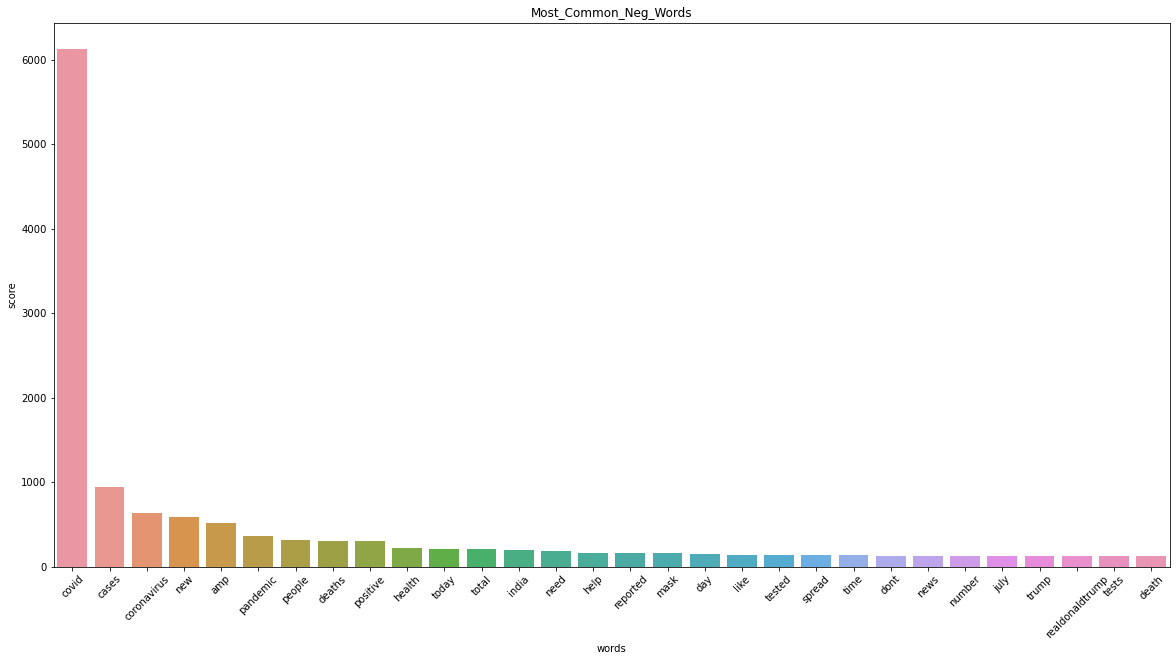

In [26]:
#plot with sea bone
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='score',data=negative_m_c_4_df)#we can use here positive and natural_m_c_4_df
plt.xticks(rotation=45)
plt.title("Most_Common_Neg_Words")
plt.show()

In [27]:
def plot_wordcloud(docx):
    my_wordcloud = WordCloud().generate(docx)
    plt.imshow(my_wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [28]:
pos_docx = ' '.join(positive_text_token)
neg_docx = ' '.join(negative_text_token)
nat_docx = ' '.join(natural_text_token)

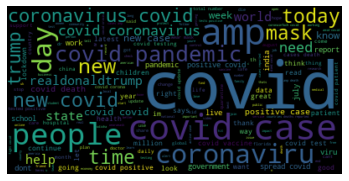

In [29]:
plot_wordcloud(pos_docx)#WE CALL OTHER TWOAS WELL 

In [32]:
df.dropna()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleaning_text,sentiment_results,Polarity,Subjectivity,Sentiment
2,time4fisticuffs,"pewee valley, ky",#christian #catholic #conservative #reagan #re...,2009-02-28 18:57:41,9275,9525,7254,false,2020-07-25 12:27:14,@diane3443 @wdunlap @realdonaldtrump trump nev...,['covid19'],twitter for android,false,diane wdunlap realdonaldtrump trump claimed co...,"{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...",0.00,0.000000,Natural
3,ethel mertz,stuck in the middle,#browns #indians #clevelandproud #[]_[] #cavs ...,2019-03-07 01:45:06,197,987,1488,false,2020-07-25 12:27:10,@brookbanktv the one gift #covid19 has give me...,['covid19'],twitter for iphone,false,brookbanktv gift covid appreciation simple thi...,"{'Polarity': 0.0, 'Subjectivity': 0.3571428571...",-0.70,0.666667,Negative
4,dipr-j&k,jammu and kashmir,🖊️official twitter handle of department of inf...,2017-02-12 06:45:15,101009,168,101,false,2020-07-25 12:27:08,25 july : media bulletin on novel #coronavirus...,"['coronavirusupdates', 'covid19']",twitter for android,false,july media bulletin novel coronavirusupdates c...,"{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...",0.05,0.500000,Positive
5,🎹 franz schubert,новоро́ссия,🎼 #новоро́ссия #novorossiya #оставайсядома #s...,2018-03-19 16:29:52,1180,1071,1287,false,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",twitter web app,false,coronavirus covid deaths continue rise bad pol...,"{'Polarity': -0.6999999999999998, 'Subjectivit...",0.00,0.000000,Natural
6,hr bartender,"gainesville, fl",workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,false,2020-07-25 12:27:03,how #covid19 will change work in general (and ...,"['covid19', 'recruiting']",buffer,false,covid change work general recruiting specifica...,"{'Polarity': 0.05000000000000002, 'Subjectivit...",0.00,0.000000,Natural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99125,jpiercea,georgia usa @gdecd 🇺🇸,"past: conrail(r), usaf/usafr(r)🇺🇸 \n present: ...",2016-12-29 01:58:51,473,767,11123,false,2020-08-10 16:05:05,.#stockmarket #news #live #updates: \n#stocks ...,"['stockmarket', 'news', 'live', 'updates', 'st...",twitter web app,false,stockmarket news live updates stocks trade mix...,"{'Polarity': 0.06818181818181818, 'Subjectivit...",0.00,0.066667,Natural
99127,steve ramona - opportunity broker,"san jose, ca",are you looking to earn more passive income pa...,2013-01-31 17:16:37,1254,2445,104,false,2020-08-10 16:05:05,do you know your strengths?\nfollow: @bizoppor...,"['dollarstorehq', 'trader', 'investment']",buffer,false,know strengthsfollow bizopportunitynowhttpstco...,"{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...",0.15,0.450000,Positive
99128,alison steeves,toronto,"communicator, passionate about health and well...",2012-10-17 17:36:30,343,387,2219,false,2020-08-10 16:05:04,listening in on #ltc webinar with experts on f...,"['ltc', 'covid19']",twitter for iphone,false,listening ltc webinar experts family presence ...,"{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...",0.00,0.000000,Natural
99129,rogers tv london,"london, ontario",this is the official twitter home of rogers tv...,2011-03-23 13:00:17,7130,2202,1396,false,2020-08-10 16:05:04,the @mlhealthunit &amp; @cityofldnont #covid19...,['covid19'],twitter web app,false,mlhealthunit amp cityofldnont covid media brie...,"{'Polarity': 0.0, 'Subjectivity': 0.0, 'Sentim...",-0.50,0.300000,Negative
